In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
import datetime
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [33]:
#Reading 6 csv files (Uber trips for April, May, June, July, August, September) in different dataframes
i=1
for file in sorted(glob.glob(r'/content/drive/MyDrive/Uber-data/uber-data-*.csv')):
  globals()['sub_df%s' % i] = pd.read_csv(file,index_col=0)
  i=i+1

In [34]:
# Combining all 6 datasets
df=pd.concat([sub_df1,sub_df2,sub_df3,sub_df4,sub_df5,sub_df6])

In [35]:
df.index=pd.to_datetime(df.index,utc=True)

In [36]:
df['Date']=pd.to_datetime(df.index).date
df['Time']=pd.to_datetime(df.index).time

In [37]:
df['week_day']=df.index.day_name()

In [38]:
df

,Lat,Lon,Base,Date,Time,week_day
Date/Time,,,,,,
2014-04-01 00:11:00+00:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,Tuesday
2014-04-01 00:17:00+00:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,Tuesday
2014-04-01 00:21:00+00:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,Tuesday
2014-04-01 00:28:00+00:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,Tuesday
2014-04-01 00:33:00+00:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,Tuesday
...,...,...,...,...,...,...
2014-09-30 22:57:00+00:00,40.7668,-73.9845,B02764,2014-09-30,22:57:00,Tuesday
2014-09-30 22:57:00+00:00,40.6911,-74.1773,B02764,2014-09-30,22:57:00,Tuesday
2014-09-30 22:58:00+00:00,40.8519,-73.9319,B02764,2014-09-30,22:58:00,Tuesday


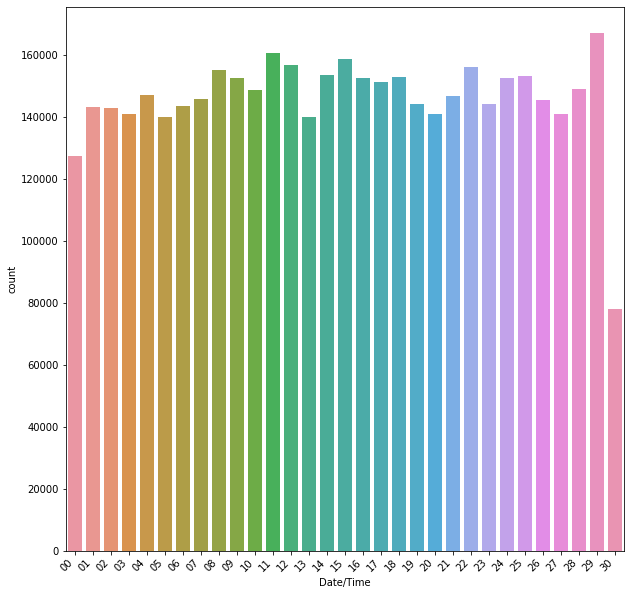

In [39]:
# Here 30th of the month has highest trips
plt.figure(figsize=(10,10))
sns.countplot(x=df.index.strftime("%d"),data=df)
xticks = np.arange(31)
plt.xticks(xticks, ['{0:02d}'.format(x) for x in xticks], rotation=45, ha='right')
plt.show()

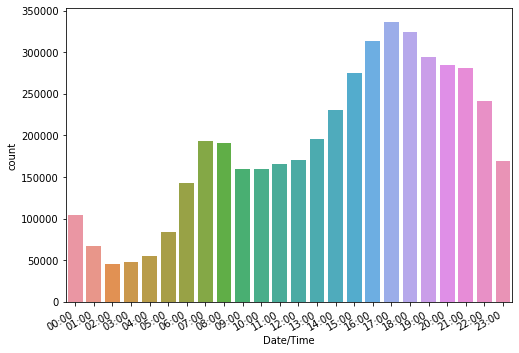

In [40]:
# Highest trips are from 4:00 PM to 6:00PM

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df.index.hour,data=df)

xticks = np.arange(24)
plt.xticks(xticks, ['{0:02d}:00'.format(x) for x in xticks], rotation=45, ha='right')
fig.autofmt_xdate()
plt.show()

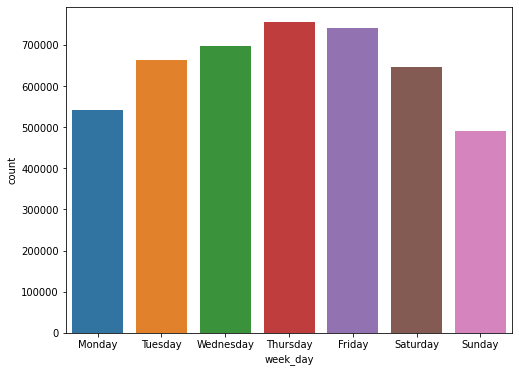

In [41]:
# Thursday and Friday have comparitively high number of trips
fig, ax = plt.subplots(figsize=(8,6))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='week_day',data=df,order=day_order)


plt.show()

In [42]:
df['month']=df.index.month

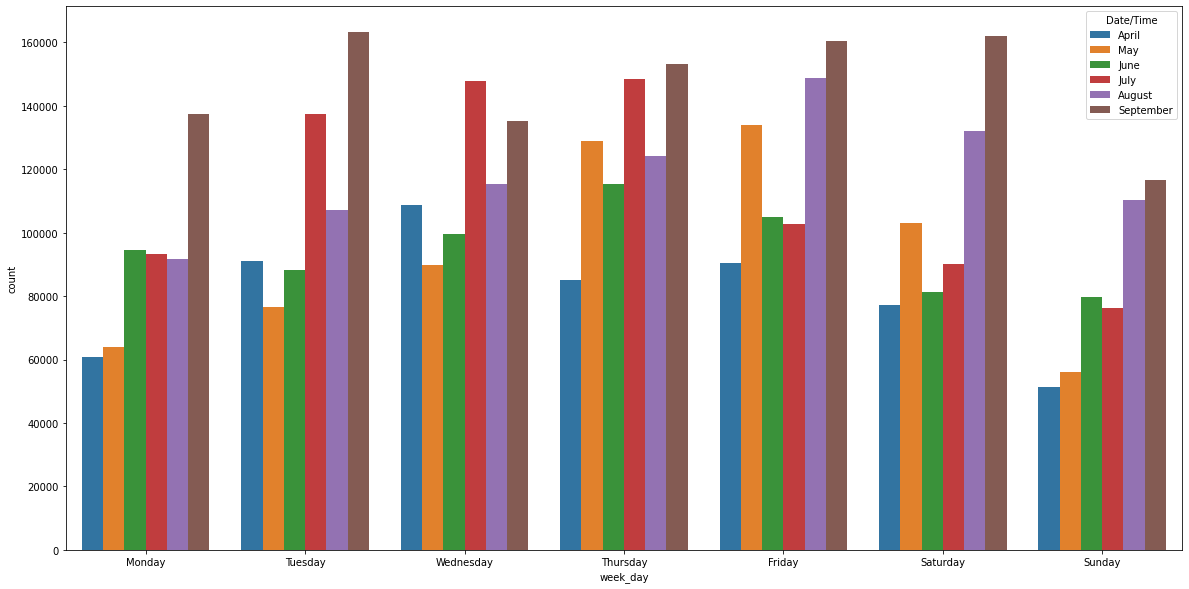

In [43]:
# September has higher number of trips 
# less number of trips on Sunday
fig, ax = plt.subplots(figsize=(20,10))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax=sns.countplot(x='week_day',hue=df.index.strftime("%B"),data=df,order=day_order)
plt.show()

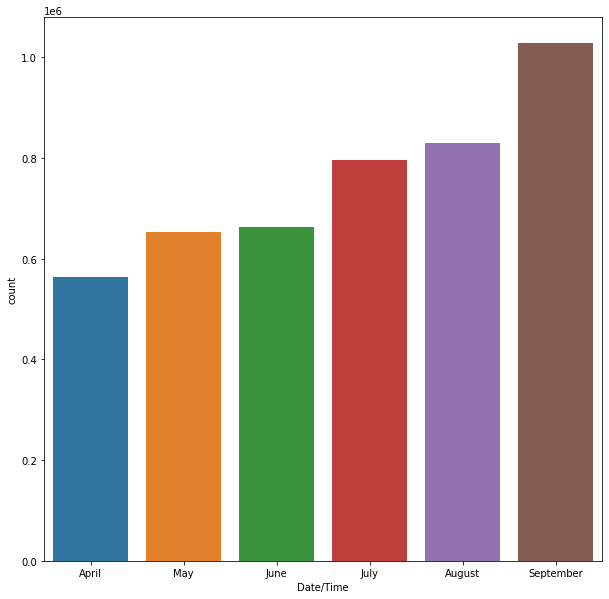

In [44]:
fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(x=df.index.strftime("%B"),data=df)

plt.show()

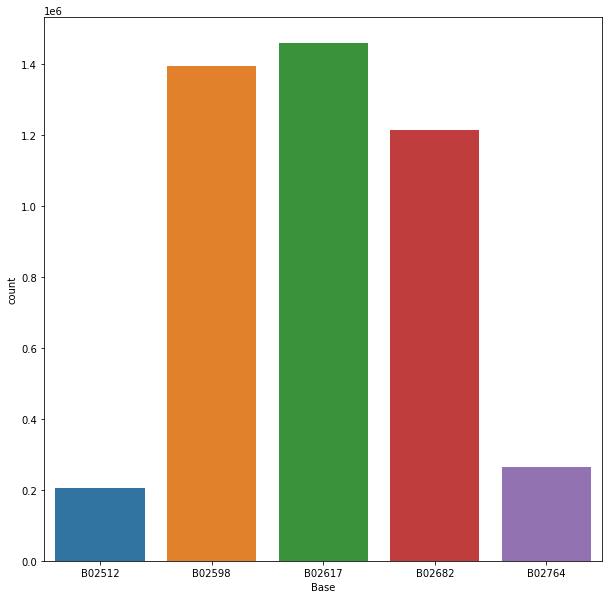

In [45]:

fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(x=df['Base'],data=df)

plt.show()

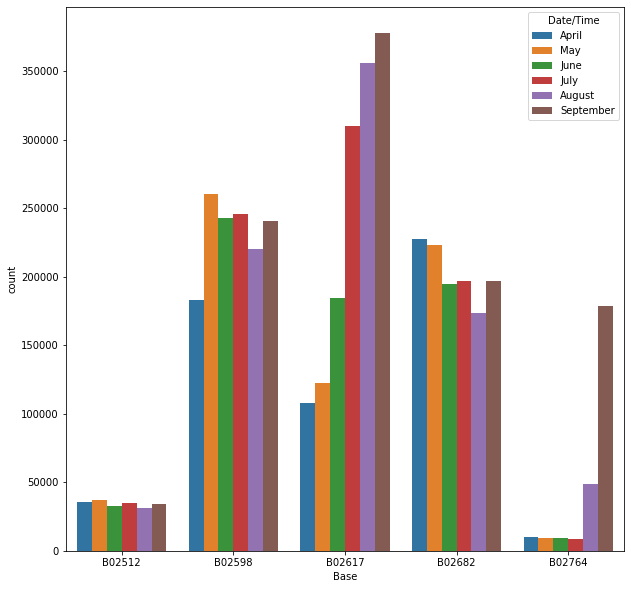

In [46]:
#B02617 had the highest trips among all other bases
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.countplot(x='Base',hue=df.index.strftime("%B"),data=df)
plt.show()

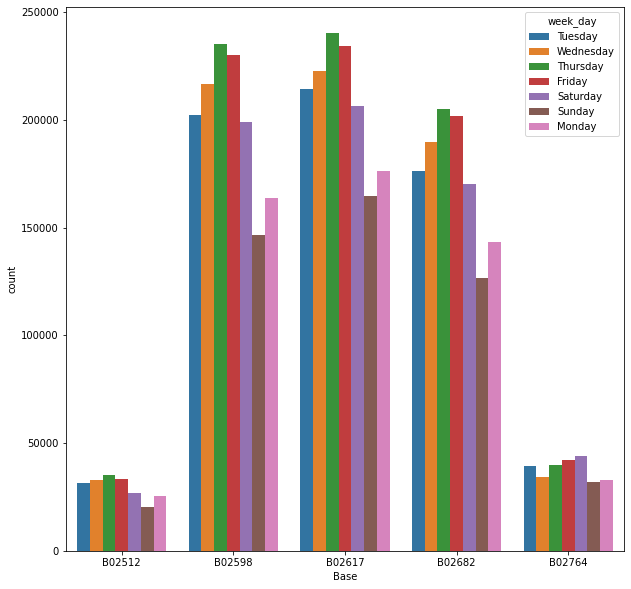

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax=sns.countplot(x='Base',hue='week_day',data=df)
plt.show()

In [48]:
BBox = (df['Lon'].min(),   df['Lon'].max(),   df['Lat'].min(), df['Lat'].max())

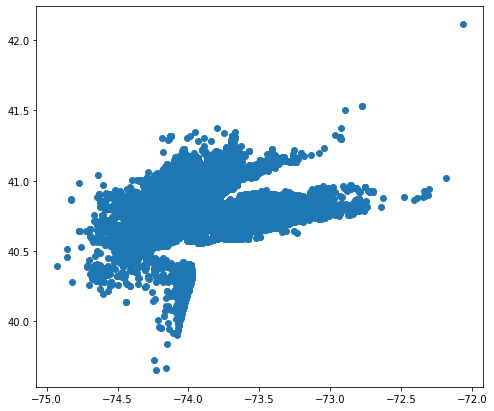

In [49]:
#Location 
fig, ax = plt.subplots(figsize = (8,7))
plt.scatter(x=df['Lon'], y=df['Lat'])
plt.show()
